In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
from validation.data import indeed_test_data, dot_train_data, get_soc_n

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 4]
plt.rcParams['savefig.dpi'] = 300

In [5]:
matched = pd.read_csv('indeed-us-titles-matched.csv')
matched['soc3'] = get_soc_n(matched['2000 SOC code'], 3)

In [26]:
bls = pd.read_csv('oes_2014_flat.csv', sep='\t')
bls = bls.dropna(subset = ['soc2000'])
bls['soc3'] = bls['soc2000'].map(lambda x: str(int(x))[:3]).astype(int)

In [16]:
predictions3 = pd.read_csv('predictions/us-soc3-predictions.csv')

In [ ]:
from sklearn.preprocessing import normalize

rel = lambda x: x/x.sum()



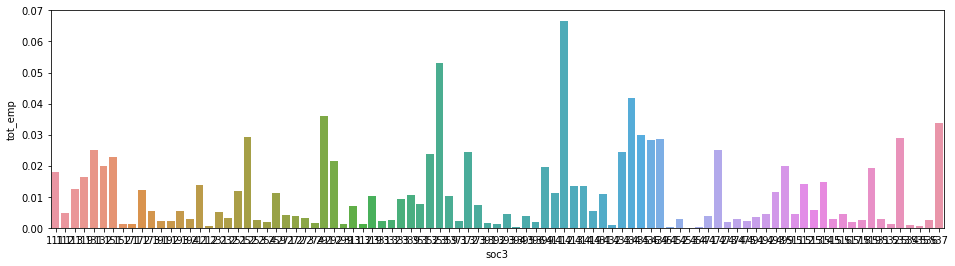

In [96]:
bls_dat = rel(bls.groupby('soc3').sum().tot_emp).reset_index()
ax = sns.barplot(x = 'soc3', y='tot_emp', data = bls_dat)
ax.get_figure().savefig('figures/bls_histogram.png')

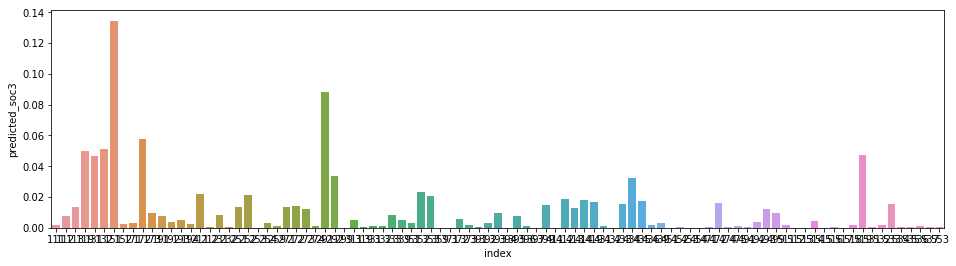

In [95]:
predicted_dat = rel(predictions3.predicted_soc3.value_counts()).reset_index()

ax = sns.barplot(x = 'index', y='predicted_soc3', data = predicted_dat)
ax.get_figure().savefig('figures/predicted_histogram.png')

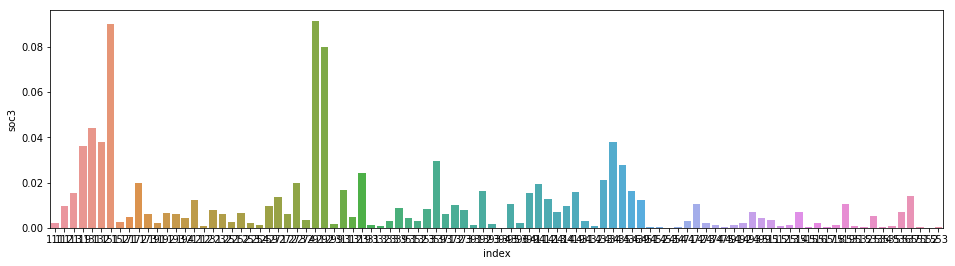

In [94]:
matched_dat = rel(matched.soc3.value_counts()).reset_index()
ax = sns.barplot(x = 'index', y='soc3', data = matched_dat)
ax.get_figure().savefig('figures/matched_histogram.png')

In [ ]:
bls_dat.soc3

In [ ]:
pred_prob = predicted_dat.sort_values('index').predicted_soc3
bls_prob = bls_dat.sort_values('soc3').tot_emp

In [136]:
s = matched_dat.sort_values('index')
s = s[s['index'].isin(bls_dat.soc3)]

In [138]:
np.equal(s['index'].values, bls_dat.soc3.values).sum()

93

In [143]:
predicted_dat.sort_values('index')['index']

55    111
34    112
23    113
4     119
6     131
3     132
0     151
49    152
44    171
2     172
30    173
33    191
41    192
37    193
48    194
10    211
64    212
31    231
66    232
24    251
11    252
91    253
47    254
62    259
22    271
21    272
26    273
56    274
1     291
7     292
     ... 
45    439
87    451
69    452
84    453
78    454
73    471
17    472
67    474
63    475
72    491
42    492
27    493
29    499
54    511
81    512
82    513
40    514
86    515
65    516
92    517
53    518
5     519
77    531
52    532
18    533
75    534
71    535
59    536
70    537
68    553
Name: index, Length: 93, dtype: int64

In [ ]:
bls_dat.soc3.values

In [111]:
from scipy.stats import entropy



entropy(bls_prob, pred_prob)

1.4813864556856637